In [5]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [105]:
ne_df = pd.read_csv("ne_train.csv")
south = pd.read_csv('south_train.csv')

### Log Transformations

Based on the arima models, we saw that using a log transformation made the data in both instances stationary and perform better when the model was built, also when the zeroes were removed.

In [120]:
ne_df_filtered = ne_df[ne_df['covid_19_confirmed_cases'] != 0]
ne_df_filtered['cases_log'] = np.log(ne_df_filtered['covid_19_confirmed_cases'])

south_filtered = south[south['covid_19_confirmed_cases'] != 0]
south_filtered['cases_log'] = np.log(south_filtered['covid_19_confirmed_cases'])

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16226/574951979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ne_df_filtered['cases_log'] = np.log(ne_df_filtered['covid_19_confirmed_cases'])
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16226/574951979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_filtered['cases_log'] = np.log(south_filtered['covid_19_confirmed_cases'])


### Model - NE

In [107]:
# finding model with best parameters
ne_model = auto_arima(ne_df_filtered['cases_log'], 
                   start_p=1, start_q=1,test='adf',
                   max_p=4, max_q=4,m=1, d=1,seasonal=False, 
                   start_P=0, D=None, trace=True,
                   error_action='ignore',  suppress_warnings=True, stepwise= False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=99.822, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=99.269, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=90.864, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=92.838, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=91.181, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=98.021, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=98.161, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=70.388, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=94.863, Time=0.10 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=67.911, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=92.196, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=71.417, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=72.797, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=68.558, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=87.151, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AI

In [108]:
ne_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  153
Model:               SARIMAX(3, 1, 2)   Log Likelihood                 -24.535
Date:                Mon, 04 Dec 2023   AIC                             63.070
Time:                        19:53:14   BIC                             84.238
Sample:                             0   HQIC                            71.669
                                - 153                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0042      0.007      0.575      0.566      -0.010       0.019
ar.L1         -0.3067      0.083     -3.717      0.000      -0.468      -0.145
ar.L2          0.8032      0.052     15.405      0.000       0.701       0.905
ar.L3          0.4739      0.055      8.670      0.000       0.367       0.581
ma.L1          0.0484      0.079      0.610      0.542      -0.107       0.204
ma.L2         -0.7839      0.086     -9.068      0.000      -0.953      -0.614
sigma2         0.0798      0.008     10.310      0.000       0.065       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                20.67
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
ne_results = ne_model.fit(ne_df_filtered['cases_log'])
ne_pred = ne_results.predict(len(ne_df_filtered['cases_log']))
mean_absolute_error(ne_df_filtered['cases_log'],np.exp(ne_pred))

/Users/lalla-aichaadouim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


63105818.25090673

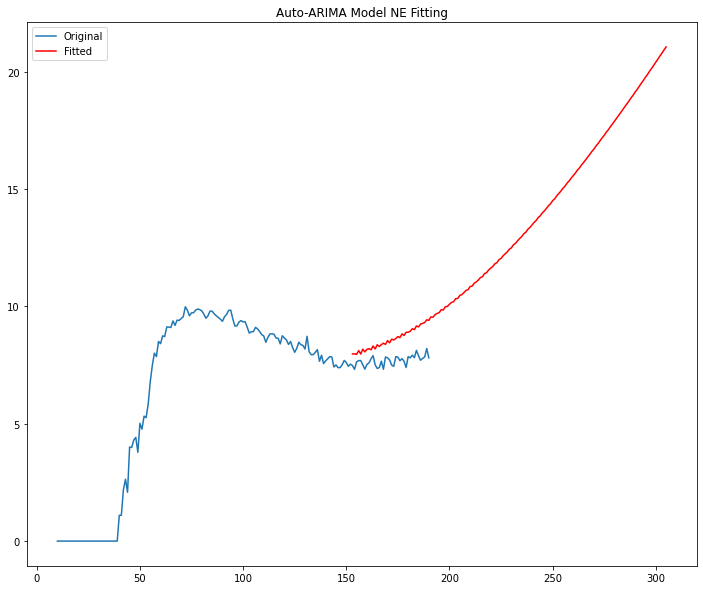

In [23]:
plt.figure(figsize=(12, 10))
plt.plot(ne_df_filtered['cases_log'], label='Original')
plt.plot(ne_pred, color='red', label='Fitted')
plt.legend()
plt.title('Auto-ARIMA Model NE Fitting')
plt.show()

MAE is ridculously high on first round of testing, could be due to the log transformation -> try on data without transformation

In [121]:
ne_df_filtered['cases_diff'] = ne_df_filtered['covid_19_confirmed_cases'].diff()
ne_df_filtered = ne_df_filtered.dropna()

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16226/3158992409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ne_df_filtered['cases_diff'] = ne_df_filtered['covid_19_confirmed_cases'].diff()


In [122]:
ne_model = auto_arima(ne_df_filtered['cases_diff'], 
                   start_p=1, start_q=1,
                   max_p=4, max_q=4,m=1, d=1,stepwise=False)

In [123]:
ne_results = ne_model.fit(ne_df_filtered['cases_diff'])
ne_pred = ne_results.predict(len(ne_df_filtered['cases_diff'])).dropna()
mean_absolute_error(ne_df_filtered['cases_diff'], ne_pred)

/Users/lalla-aichaadouim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


891.3577282519378

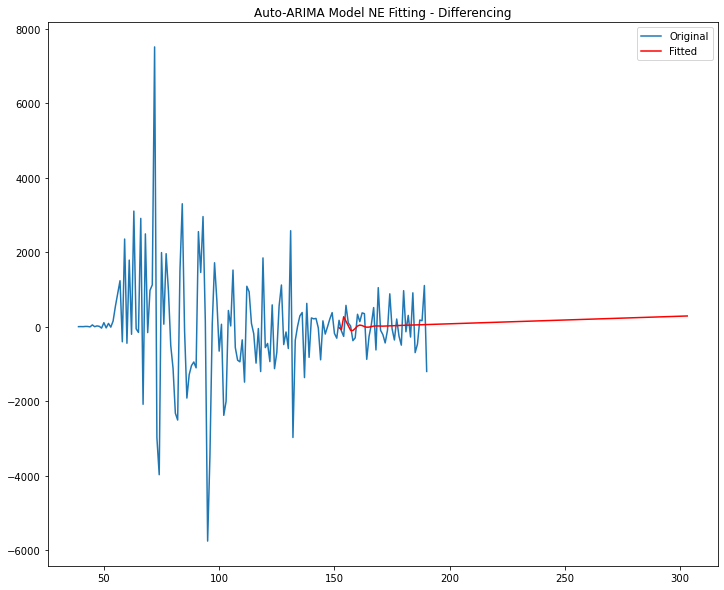

In [124]:
plt.figure(figsize=(12, 10))
plt.plot(ne_df_filtered['cases_diff'], label='Original')
plt.plot(ne_pred, color='red', label='Fitted')
plt.legend()
plt.title('Auto-ARIMA Model NE Fitting - Differencing')
plt.show()

In [114]:
# model on dataset with no differencing or transformations

In [125]:
ne_df_filtered = ne_df[ne_df['covid_19_confirmed_cases'] != 0]
ne_model = auto_arima(ne_df_filtered['covid_19_confirmed_cases'], 
                   start_p=1, start_q=1,
                   max_p=4, max_q=4,m=1, d=1,stepwise=False)

In [126]:
ne_results = ne_model.fit(ne_df_filtered['covid_19_confirmed_cases'])
ne_pred = ne_results.predict(len(ne_df_filtered['covid_19_confirmed_cases']))

/Users/lalla-aichaadouim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


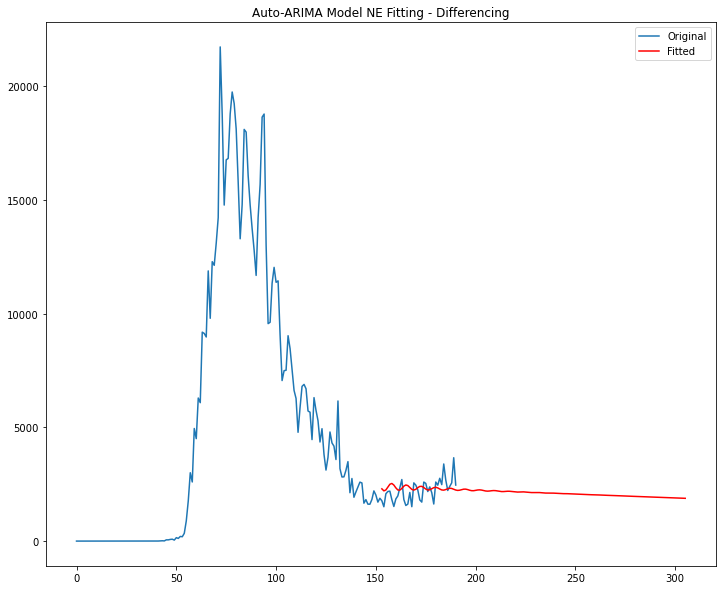

In [127]:
plt.figure(figsize=(12, 10))
plt.plot(ne_df['covid_19_confirmed_cases'], label='Original')
plt.plot(ne_pred, color='red', label='Fitted')
plt.legend()
plt.title('Auto-ARIMA Model NE Fitting - Differencing')
plt.show()

In [118]:
mean_absolute_error(ne_df_filtered['covid_19_confirmed_cases'],ne_pred)

4355.956691581884

### Out of the three types of models, the model with data that underwent differencing exhibits the best MAE

### Model - South

In [129]:
south_filtered['cases_diff'] = south_filtered['covid_19_confirmed_cases'].diff()
south_filtered = south_filtered.dropna()

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16226/2764990992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_filtered['cases_diff'] = south_filtered['covid_19_confirmed_cases'].diff()


In [130]:
south_model = auto_arima(south_filtered['cases_diff'], 
                   start_p=1, start_q=1,test='adf',
                   max_p=4, max_q=4,m=1, d=1,seasonal=False, 
                   start_P=0, D=None, trace=True,
                   error_action='ignore',  suppress_warnings=True, stepwise= False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2748.462, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2622.713, Time=0.15 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2620.100, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2700.019, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2620.877, Time=0.20 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2628.095, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2685.459, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2683.631, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf

In [131]:
south_results = south_model.fit(south_filtered['cases_diff'])
south_pred = south_results.predict(len(south_filtered['cases_diff']))

/Users/lalla-aichaadouim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [134]:
mean_absolute_error(south_filtered['cases_diff'],south_pred)

1310.621654776562